### Contents:
- [Total Sales by Payment Method](#What-are-the-total-sales-for-each-payment-method?)
- [What is the average unit price for each product line?](#What-is-the-average-unit-price-for-each-product-line?)
- [Average Purchase Price by Client Type and Warehouse](#Average-Purchase-Price-by-Client-Type-and-Warehouse)
- [Most sold product line](#Most-sold-product-line)
- [Sales over time](#Sales-over-time)
- [Average quantity by Order per Warehouse](#Average-quantity-by-Order-per-Warehouse)
- [Summary](#Summary)

##### First we import the required libraries followed by the data and do an initial EDA by visually checking the datas properties and some summary statistics

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('data/sales_data.csv', parse_dates=['date'])
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1000 non-null   datetime64[ns]
 1   warehouse     1000 non-null   object        
 2   client_type   1000 non-null   object        
 3   product_line  1000 non-null   object        
 4   quantity      1000 non-null   int64         
 5   unit_price    1000 non-null   float64       
 6   total         1000 non-null   float64       
 7   payment       1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 62.6+ KB


##### The data appears to be complete with no missing values, however we can inspect the values further by checking for typos and/or zero values within the numeric columns

In [5]:
df.isnull().sum()

date            0
warehouse       0
client_type     0
product_line    0
quantity        0
unit_price      0
total           0
payment         0
dtype: int64

In [6]:
cat_cols = df.select_dtypes(exclude=['number', 'datetime'])
for c in cat_cols.columns:
    print(f' {c.upper()} unique values are: {df[c].unique()}', end='\n\n')

 WAREHOUSE unique values are: ['Central' 'North' 'West']

 CLIENT_TYPE unique values are: ['Retail' 'Wholesale']

 PRODUCT_LINE unique values are: ['Miscellaneous' 'Breaking system' 'Suspension & traction' 'Frame & body'
 'Engine' 'Electrical system']

 PAYMENT unique values are: ['Credit card' 'Cash' 'Transfer']



In [7]:
df.describe()

,quantity,unit_price,total
count,1000.000000,1000.000000,1000.000000
mean,9.395000,30.322040,289.113000
std,9.659207,12.256488,345.227596
min,1.000000,10.030000,10.350000
25%,4.000000,21.085000,93.687500
50%,6.500000,28.570000,178.360000
75%,10.000000,37.917500,321.690000
max,40.000000,66.620000,2546.330000


##### No zero numeric values (which could be considered missing in this scenario) and no typos in categorical data, thus we can proceed with our analysis answering the first business question:
[Click here to return to Contents](#Contents:)

### What are the total sales for each payment method?

Text(0, 0.5, 'Total sales')

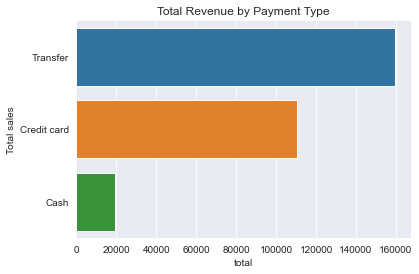

In [58]:
payment_totals = (df.groupby('payment')[['total']]
                    .sum()
                    .sort_values('total', ascending=False)
                    .reset_index()
                 )

sns.barplot(data=payment_totals, y='payment', x='total', orient='h')
plt.title('Total Revenue by Payment Type')
plt.ylabel('Total sales')

##### Looks like **Transfer** is the overall preferred payment method and our intuition suggests this is also the most frequent mean of paying for an order but the barplot above is only telling us **how much total income** is generated by the payment types. This could be due to either a *higher overall count of transfers* or *fewer transfers of bigger sums per transfer*. We can confirm this by another quick groupby and a countplot.

In [9]:
totals_by_warehouse = df.groupby('payment')[['total']].count()
totals_by_warehouse

,total
payment,
Cash,116
Credit card,659
Transfer,225


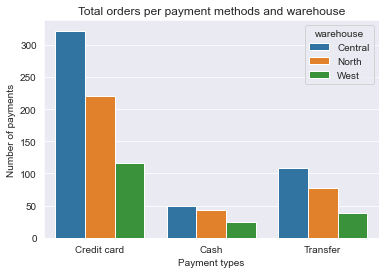

In [10]:
_ = sns.countplot(data=df, x='payment', hue='warehouse')
_ = plt.xlabel('Payment types')
_ = plt.ylabel('Number of payments')
_ = plt.title('Total orders per payment methods and warehouse')

##### Our **intuition failed us** as there are approx. 3 times more credit card sales however for smaller amounts. The countplot confirms the same proportion of payments over every warehouse of which the *Central Warehouse* is completing the most orders by every payment method. 
[Click here to return to Contents](#Contents:)

### What is the average unit price for each product line?

            product_line  unit_price
0        Breaking system   17.740522
1          Miscellaneous   22.810738
2      Electrical system   25.585130
3  Suspension & traction   33.969868
4           Frame & body   42.832229
5                 Engine   60.091803
6        Overall average   30.322040


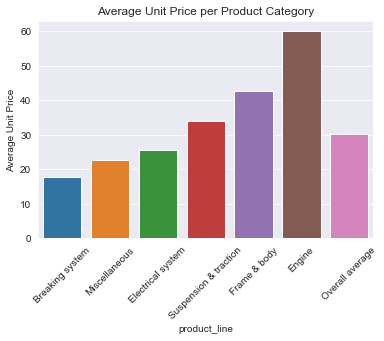

In [11]:
avg_unitprice = (df.groupby('product_line')[['unit_price']]
                   .mean()
                   .sort_values('unit_price')
                   .reset_index()
                   .append({'product_line': 'Overall average', 
                            'unit_price': df['unit_price'].mean()
                           }, ignore_index=True
                          )
                 )
print(avg_unitprice)

_ = sns.barplot(data=avg_unitprice, y='unit_price', x='product_line')
_ = plt.xticks(rotation=45)
_ = plt.ylabel('Average Unit Price')
_ = plt.title('Average Unit Price per Product Category')

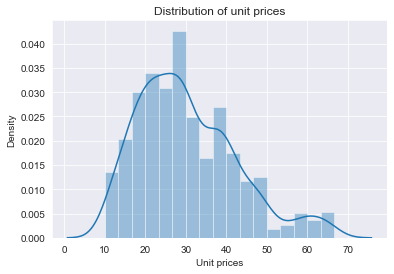

In [12]:
_ = sns.distplot(df['unit_price'])
_ = plt.xlabel('Unit prices')
_ = plt.title('Distribution of unit prices')

##### Overall average **unit price** is **30.32** and it varies per **product line** *Engine* having the highest average. The distribution of **unit prices** is slightly right skewed thus showing there are significantly more items of lower price available than expensive ones.
[Click here to return to Contents](#Contents:)

### Average Purchase Price by Client Type and Warehouse

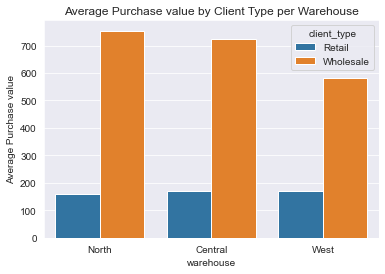

In [13]:
avg_purchase = (df.groupby(['client_type', 'warehouse'])[['total']]
                  .mean()
                  .sort_values('total')
                  .reset_index()
               )

_ = sns.barplot(data=avg_purchase, x='warehouse', y='total', hue='client_type')
_ = plt.title('Average Purchase value by Client Type per Warehouse')
_ = plt.ylabel('Average Purchase value')

[Click here to return to Contents](#Contents:)

### Most sold product line

In [14]:
most_sold = (df.groupby('product_line')[['total', 'unit_price']]
               .agg({'total': 'sum', 'unit_price': 'mean'})
               .sort_values('total', ascending=False)
               .reset_index()
            )
most_sold

,product_line,total,unit_price
0,Suspension & traction,73014.21,33.969868
1,Frame & body,69024.73,42.832229
2,Electrical system,43612.71,25.585130
3,Breaking system,38350.15,17.740522
4,Engine,37945.38,60.091803
5,Miscellaneous,27165.82,22.810738


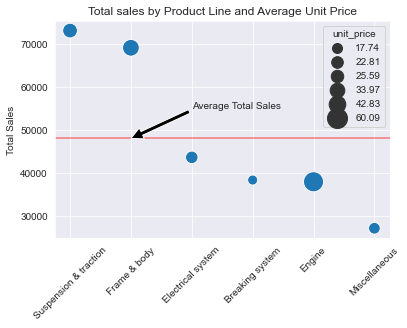

In [22]:
_ = sns.scatterplot(data=most_sold, x='product_line', y='total', size=most_sold['unit_price'].round(2), sizes=(100, 400))
_.axhline(most_sold['total'].mean(), alpha=0.5, label='Average Overall Sales', c='red')
_.annotate('Average Total Sales', xy=('Frame & body', 48000), xytext=('Electrical system', 55000), arrowprops={'facecolor':'black'})
_ = plt.xticks(rotation=45)
_ = plt.title('Total sales by Product Line and Average Unit Price')
_ = plt.xlabel(None)
_ = plt.ylabel('Total Sales')

##### Altough the *Engine* line has the highest average unit price the most sold category is *Suspension & traction* with *Frame & Body* close second and both of them also have a very close average price per item to the overall unit price average of **30.32**.  
[Click here to return to Contents](#Contents:)

### Sales over time

In [16]:
# extracting the month and months name from the datetime column for timeseries analysis below
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment,month,month_name
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card,6,June
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash,6,June
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card,6,June
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer,6,June
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card,6,June


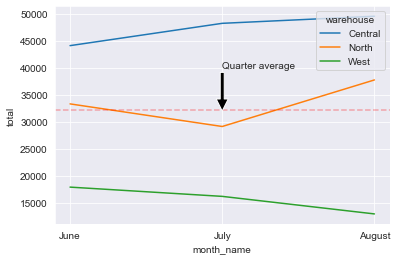

<Figure size 1080x432 with 0 Axes>

In [18]:
monthly_sales_per_warehouse = (df.groupby(['month','month_name', 'warehouse'])[['total']]
                                 .sum()
                                 .reset_index(level=['month_name', 'warehouse'])
                              )

_ = sns.lineplot(data=monthly_sales_per_warehouse, x='month_name', y='total', hue='warehouse')
_.axhline(monthly_sales_per_warehouse['total'].mean(), alpha=0.3, linestyle='--', c='red')
_.annotate('Quarter average', xy=('July', 32000), xytext=('July', 40000), arrowprops={'facecolor':'black'})
_ = plt.figure(figsize=(15,6))

##### Data shows that **Central Warehouse** grothw has slowed down over the course of summer, however still being the **top seller** and closed the quarter with higher sales since start. Despite fluctuating around the overall average, **North Warehouse** has also **increased its sales** and has shown an increasing trend. **West Warehouse** not only producing the **lowest sales** but also showing a recession in the same period. 

In [86]:
monthly_sales_per_client = (df.groupby(['month', 'month_name', 'client_type'])['total']
                              .agg(['sum', 'mean', 'count'])
                              .reset_index(level=['month_name', 'client_type']))
monthly_sales_per_client

,month_name,client_type,sum,mean,count
month,,,,,
6,June,Retail,46220.15,172.463246,268
6,June,Wholesale,49099.88,701.426857,70
7,July,Retail,44461.80,165.285502,269
7,July,Wholesale,49086.11,645.869868,76
8,August,Retail,38788.72,162.977815,238
8,August,Wholesale,61456.34,777.928354,79


Text(0, 0.5, 'Orders')

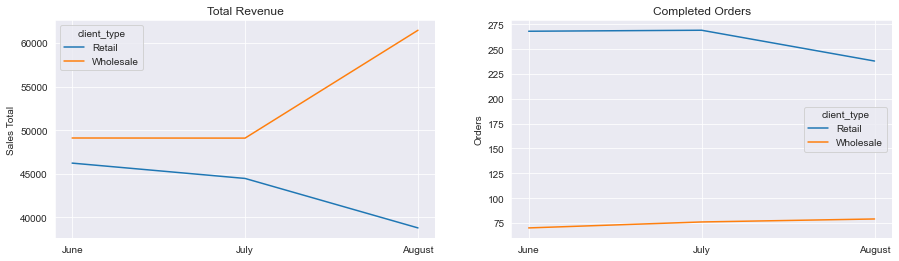

In [87]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,4))
sns.lineplot(data=monthly_sales_per_client, x='month_name', y='sum', hue='client_type', ci=False, ax=ax0)
sns.lineplot(data=monthly_sales_per_client, x='month_name', y='count', hue='client_type', ci=False, ax=ax1)
ax0.set_title('Total Revenue')
ax0.set_xlabel(None)
ax0.set_ylabel('Sales Total')
ax1.set_title('Completed Orders')
ax1.set_xlabel(None)
ax1.set_ylabel('Orders')

##### We can also see on the plot above that **Retail sales** are heavily **declining** and despite there are still significantly more **Retail Sales** it is showing a decreasing trend both in revenue generated and also in the amount of completed orders 
[Click here to return to Contents](#Contents:)

### Average quantity by Order per Warehouse

In [91]:
avg_quantity_per_order = (df.groupby(['warehouse', 'client_type'])[['quantity']]
                            .mean()
                            .reset_index()
                         )
                            
avg_quantity_per_order        

,warehouse,client_type,quantity
0,Central,Retail,5.495957
1,Central,Wholesale,22.825688
2,North,Retail,5.300380
3,North,Wholesale,24.155844
4,West,Retail,5.546099
5,West,Wholesale,21.333333


Text(0, 0.5, 'Number of items per Order')

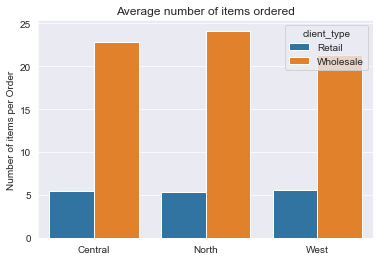

In [93]:
sns.barplot(data=avg_quantity_per_order, x='warehouse', y='quantity', hue='client_type')
plt.title('Average number of items ordered')
plt.xlabel(None)
plt.ylabel('Number of items per Order')

[Click here to return to Contents](#Contents:)

### Summary

#### Key findings:
- ##### Despite Credit card payments and Retail sales are the most frequent, the majority of revenue is generated via the Transfer payment method and through Wholesale orders of which the per order Total is also significantly higher
- ##### The most expensive product line is the Engine category, however most orders contain parts from below-average unit price product lines, thus most ordered items are falling into Suspension & traction and Frame & Body category
- ##### The Central Warehouse has completed the most orders and generated the most revenue in this quarter but its initial growth has slowed done. The North Warehouse sales is fluctuating around the quarters average, however it has shown an increase over this period and the biggest growth. The West Warehouse was in recession and had the lowest amount of orders and generated the least revenue

#### Recommendations:
- ##### There is a visible trend of overall sales decreasing in the West Warehouse, this should be investigated further and re-evaluate profitability, while investigate the slowing growth-rate in the Central Warehouse
- ##### The demand for retail orders are declining and by this trend the number of items per order and sales generated also. Focus should shift to promoting Wholesale orders - of which the demand is increasing - contain more items and higher-per-transaction sales, thus resulting in more revenue  
##### End of analysis 
[Click here to return to top](#Contents:)
